# Análise de Dados sobre COVID-19 🦠📊


## Introdução
Nesta análise de dados, vamos explorar o conjunto de dados sobre a COVID-19 para obter insights relevantes sobre a propagação da doença, óbitos e vacinações.

O conjunto de dados utilizado nesta análise é obtido a partir da fonte disponível no Kaggle: [Covid 19 Dataset](https://www.kaggle.com/datasets/tohidkhanbagani/covid-19-deaths-and-vaccinations-dataset?select=COVID+DEATHS.csv). Ele contém informações sobre casos confirmados, óbitos relacionados à COVID-19 e dados de vacinação em diversas localidades.

Vamos realizar uma análise exploratória e aplicar técnicas de visualização para entender os padrões e tendências relacionados à pandemia de COVID-19.

🎯 **Objetivos:**
- Explorar os dados sobre casos confirmados e óbitos relacionados à COVID-19.
- Avaliar a cobertura e eficácia da vacinação em diferentes áreas.
- Identificar insights que possam auxiliar nas estratégias de combate à pandemia.

Vamos mergulhar nos dados e começar nossa jornada de análise!

In [1]:
# Importando bibliotecas e arquivos
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from adjustText import adjust_text

covid_deaths = pd.read_csv(
    "COVID_DEATHS.csv")

covid_vax = pd.read_csv(
    "COVID_VACCINATIONS.csv")

In [2]:
# Verificando dataset
covid_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            302749 non-null  object 
 1   continent                           288347 non-null  object 
 2   location                            302749 non-null  object 
 3   date                                302749 non-null  object 
 4   population                          302749 non-null  int64  
 5   total_cases                         266771 non-null  float64
 6   new_cases                           294064 non-null  float64
 7   new_cases_smoothed                  292800 non-null  float64
 8   total_deaths                        246214 non-null  float64
 9   new_deaths                          294139 non-null  float64
 10  new_deaths_smoothed                 292909 non-null  float64
 11  total_cases_per_million   

In [5]:
# Verificando dataset
covid_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

### Evolução dos Casos de COVID-19 📈🦠

Nesta seção, mergulharemos na análise da evolução dos casos confirmados de COVID-19 ao longo do tempo. Isso nos permitirá entender como a pandemia se desenvolveu em diferentes regiões e se há correlações com outras variáveis.

- Como os casos confirmados de COVID-19 evoluíram ao longo do tempo em diferentes regiões (continentes ou países)?
- Existe uma correlação entre o número de casos confirmados de COVID-19 e o número de testes realizados em diferentes países?

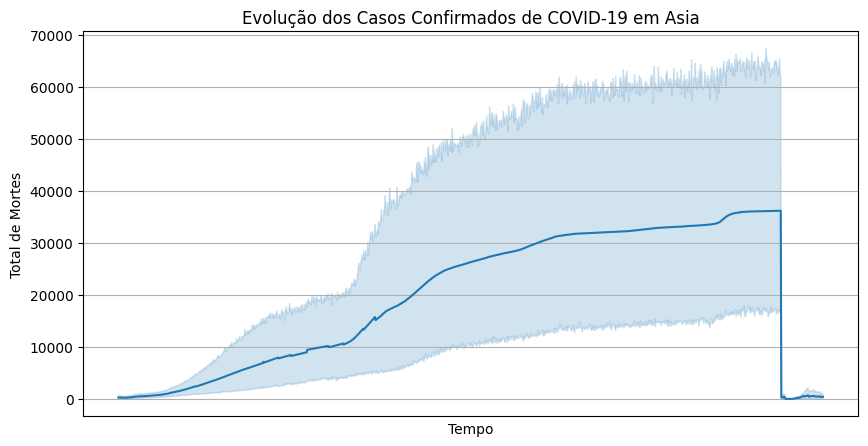

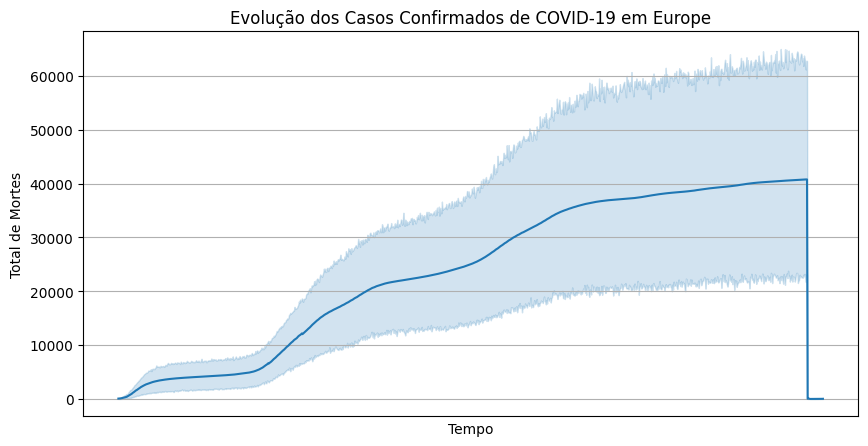

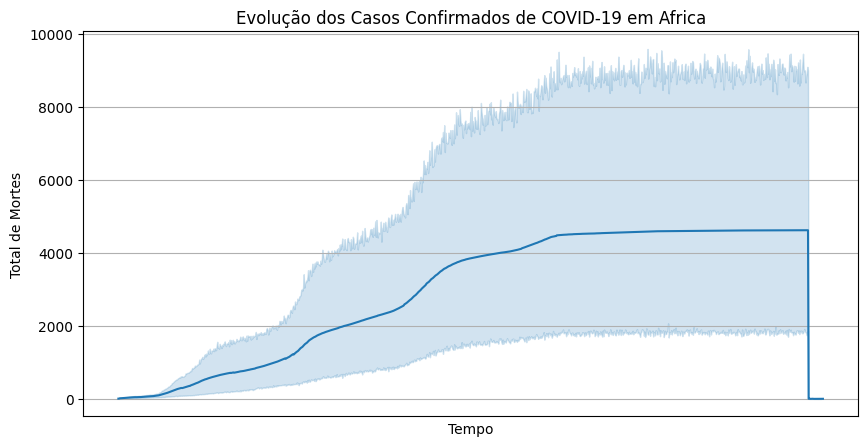

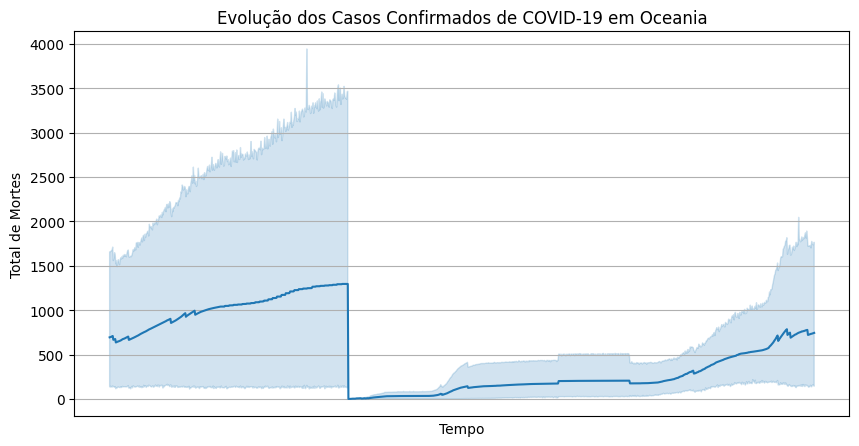

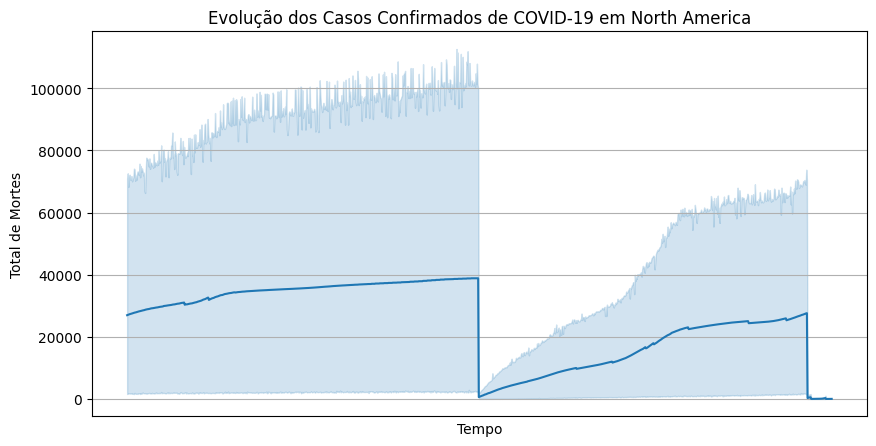

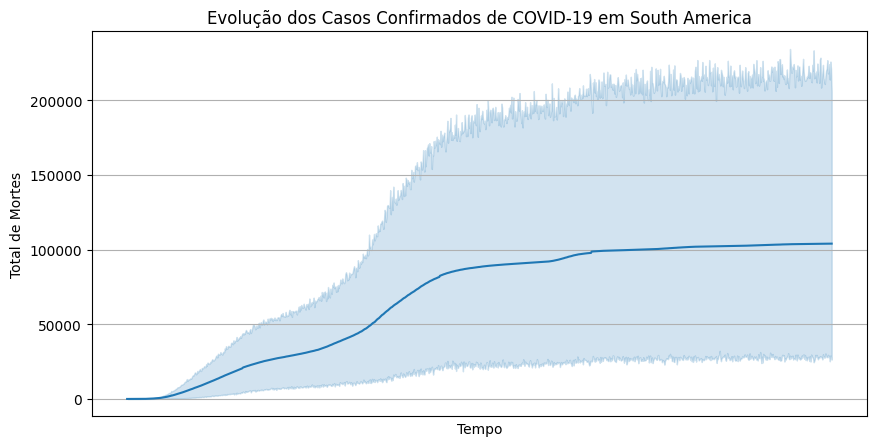

In [33]:
# Como os casos confirmados de COVID-19 evoluíram ao longo do tempo em diferentes regiões (continentes ou países)?

c_deaths = covid_deaths[['continent', 'date', 'total_deaths']]

df = c_deaths.dropna()

for continent in df['continent'].unique():
    plt.figure(figsize=(10, 5))  # Tamanho do gráfico
    sb.lineplot(x='date', y='total_deaths', data=df[df['continent'] == continent])
    plt.title(f"Evolução dos Casos Confirmados de COVID-19 em {continent}")
    plt.xlabel("Tempo")
    plt.ylabel("Total de Mortes")
    plt.gca().set_xticks([])
    plt.grid()
    plt.show()


Observamos um aumento acentuado nos casos de COVID-19 logo no início do intervalo de tempo em todas as regiões. Apesar disso, em algumas regiões, com destaque para a Oceania, ocorreu uma queda abrupta seguida por um crescimento mais moderado. Esses padrões podem indicar eficácia de medidas como lockdowns na redução temporária dos casos e subsequente reabertura gradual.

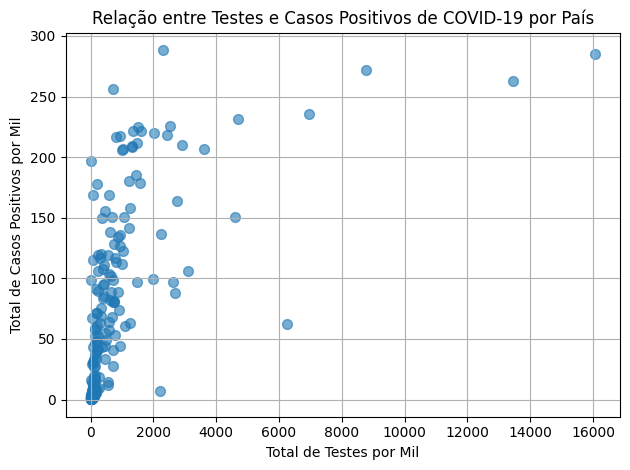

In [8]:
# 3 - Países que testaram mais pessoas tiveram menos casos positivos de Covid-19?

c_deaths = covid_deaths[['location', 'total_cases_per_million']]
c_vax = covid_vax[['location', 'total_tests_per_thousand']]

df = pd.concat([c_deaths, c_vax])

df['total_cases_per_thousand'] = (df['total_cases_per_million'] / 1000)

df = df.groupby('location').mean().round(2)

plt.scatter(df['total_tests_per_thousand'], df['total_cases_per_thousand'], s=50, alpha=0.6)

plt.xlabel('Total de Testes por Mil')
plt.ylabel('Total de Casos Positivos por Mil')
plt.title('Relação entre Testes e Casos Positivos de COVID-19 por País')

plt.grid()
plt.tight_layout()
plt.show()

Não é possível determinar relação entre número de testes e total de casos positivos.

### Vacinação 💉

Nesta seção, exploraremos os dados relacionados à vacinação contra a COVID-19. Vamos analisar diferentes aspectos das taxas de vacinação e entender como elas se relacionam com a propagação do vírus.

- Quais são os países ou regiões com maior número de vacinações totais e totalmente vacinados em relação à sua população?
- Como as taxas de vacinação e mortalidade se comparam entre diferentes regiões?
- Existe uma relação entre a taxa de vacinação e a taxa de reprodução do vírus em diferentes regiões?
- Quais são as regiões com maior proporção de pessoas totalmente vacinadas em relação à sua população?

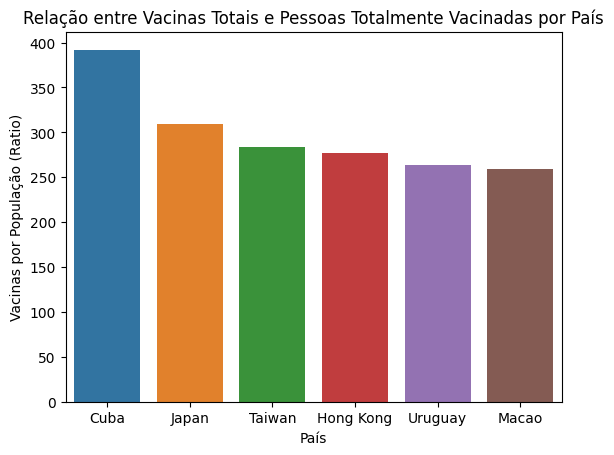

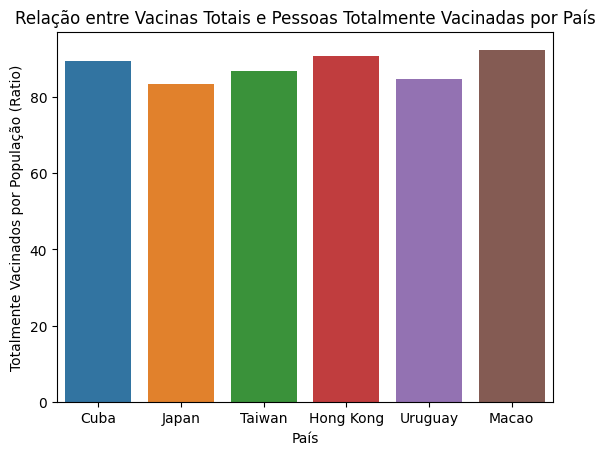

In [34]:
# Quais são os países ou regiões com maior número de vacinações e totalmente vacinados em relação à sua população?

c_deaths = covid_deaths[['location', 'population']]
c_vax = covid_vax[['location', 'total_vaccinations', 'people_fully_vaccinated']]

df = pd.concat([c_deaths, c_vax])

df['vax_per_pop'] = ((c_vax['total_vaccinations'] / c_deaths['population']) * 100).round(2)
df['fully_vax_per_pop'] = ((c_vax['people_fully_vaccinated'] / c_deaths['population']) * 100).round(2)

df = df.drop_duplicates(subset='location', keep='last', inplace=False)

df1 = df.sort_values(by='vax_per_pop', ascending=False).head(5)
df2 = df.sort_values(by='fully_vax_per_pop', ascending=False).head(5)

result = pd.concat([df1, df2])

vax = sb.barplot(x=result['location'], y=result['vax_per_pop'])
plt.xlabel('País')
plt.ylabel('Vacinas por População (Ratio)')
plt.title('Relação entre Vacinas Totais e Pessoas Totalmente Vacinadas por País')
plt.show()

fully_vax = sb.barplot(x=result['location'], y=result['fully_vax_per_pop'])
plt.xlabel('País')
plt.ylabel('Totalmente Vacinados por População (Ratio)')
plt.title('Relação entre Vacinas Totais e Pessoas Totalmente Vacinadas por País')
plt.show()

Entre as seis regiões com o maior número total de vacinações, todas também lideram em termos de população totalmente vacinada. Além disso, notável é o fato de que quatro dessas regiões estão situadas no leste asiático.

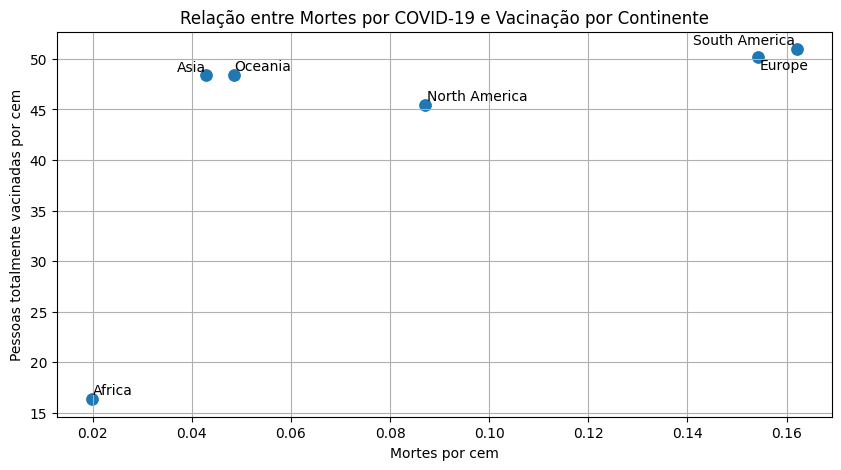

In [10]:
# Como as taxas de vacinação e mortalidade variam entre os diferentes continentes?

c_deaths = covid_deaths[['continent', 'total_deaths_per_million']]
c_vax = covid_vax[['continent', 'people_fully_vaccinated_per_hundred']]

df = pd.concat([c_deaths, c_vax])

df['total_deaths_per_hundred'] = df['total_deaths_per_million'] / 10000

df = df.drop(columns='total_deaths_per_million')

df = df.groupby('continent').mean()

plt.figure(figsize=(10, 5))
sb.scatterplot(x='total_deaths_per_hundred', y='people_fully_vaccinated_per_hundred', data=df, s=100)

labels = []
for index, row in df.iterrows():
    label = plt.text(row['total_deaths_per_hundred'], row['people_fully_vaccinated_per_hundred'], index)
    labels.append(label)

plt.xlabel('Mortes por cem')
plt.ylabel('Pessoas totalmente vacinadas por cem')
plt.title('Relação entre Mortes por COVID-19 e Vacinação por Continente')
adjust_text(labels)

plt.grid()
plt.show()

A África apresenta o menor índice de vacinação a cada 100 pessoas, assim como o menor número de mortes por 100 pessoas. Em contraste, a América registra os maiores índices de pessoas totalmente vacinadas e também de mortes por 100 pessoas. 

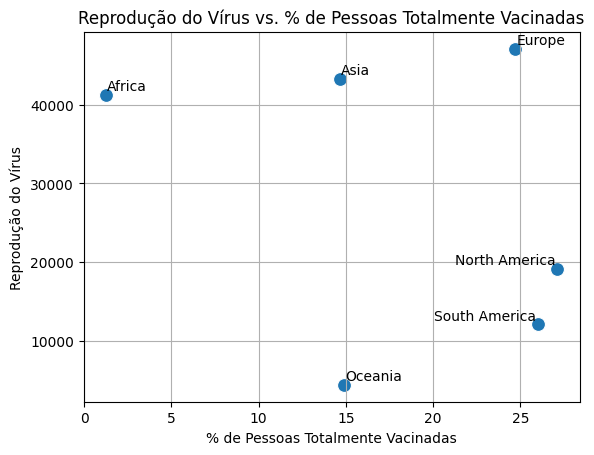

In [11]:
# Existe uma relação entre a taxa de vacinação e a taxa de reprodução do vírus em diferentes regiões?

c_deaths = covid_deaths[['location', 'continent', 'population', 'reproduction_rate']]
c_vax = covid_vax[['location', 'continent', 'people_fully_vaccinated']]

df = pd.concat([c_deaths, c_vax])
df.drop_duplicates(subset='location', keep='last')
df = df.groupby('continent').sum(['population', 'total_vaccinations', 'people_fully_vaccinated']).round(2)

df['fully_vax_per_pop'] = ((df['people_fully_vaccinated'] / df['population']) * 100).round(2)

sb.scatterplot(x='fully_vax_per_pop', y='reproduction_rate', data=df, s=100)

labels = []
for index, row in df.iterrows():
    label = plt.text(row['fully_vax_per_pop'], row['reproduction_rate'], index)
    labels.append(label)


plt.title('Reprodução do Vírus vs. % de Pessoas Totalmente Vacinadas')
plt.xlabel('% de Pessoas Totalmente Vacinadas')
plt.ylabel('Reprodução do Vírus')

adjust_text(labels)
plt.grid(True)
plt.show()

Apesar da Oceania ter uma taxa de vacinação de aproximadamente 15% da população, surpreendentemente, a taxa de reprodução do vírus foi excepcionalmente baixa na região. Isso sugere que medidas rigorosas de contenção e políticas de saúde pública podem ter desempenhado um papel crucial na prevenção da disseminação do vírus.

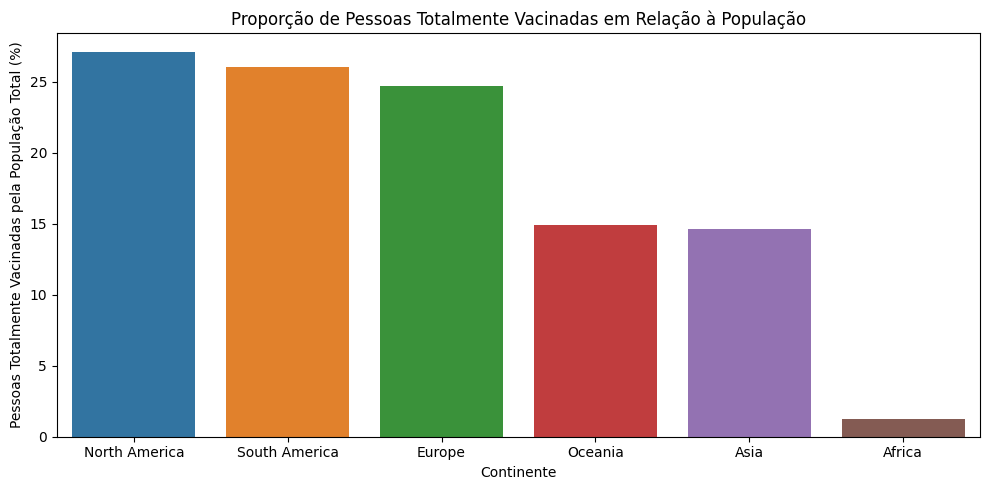

In [12]:
# Quais são as regiões com maior proporção de pessoas totalmente vacinadas em relação à sua população?

c_deaths = covid_deaths[['location', 'continent', 'population']]
c_vax = covid_vax[['location', 'continent', 'total_vaccinations', 'people_fully_vaccinated']]

df = pd.concat([c_deaths, c_vax])
df.drop_duplicates(subset='location', keep='last')
df = df.groupby('continent').sum(['population', 'total_vaccinations', 'people_fully_vaccinated']).round(2)

df['fully_vax_per_pop'] = ((df['people_fully_vaccinated'] / df['population']) * 100).round(2)

df = df.sort_values(by='fully_vax_per_pop', ascending=False)

plt.figure(figsize=(10, 5))
sb.barplot(x=df.index, y=df['fully_vax_per_pop'])
plt.title('Proporção de Pessoas Totalmente Vacinadas em Relação à População')
plt.xlabel('Continente')
plt.ylabel('Pessoas Totalmente Vacinadas pela População Total (%)')

plt.tight_layout()
plt.show()

A América é o continente com o maior número de vacinados, seguida pela Europa, indicando um esforço significativo de vacinação nessas regiões.

### Saúde Pública 🏥🦠🔬

Nesta seção, iremos aprofundar nossa análise nos aspectos relacionados à saúde pública durante a pandemia. Abordaremos diferentes ângulos das taxas de vacinação e seu impacto na propagação do vírus.

- Como o número de pacientes em UTI (unidade de terapia intensiva) varia ao longo do tempo em diferentes regiões?
- Como a taxa de positividade dos testes de COVID-19 varia entre as regiões?


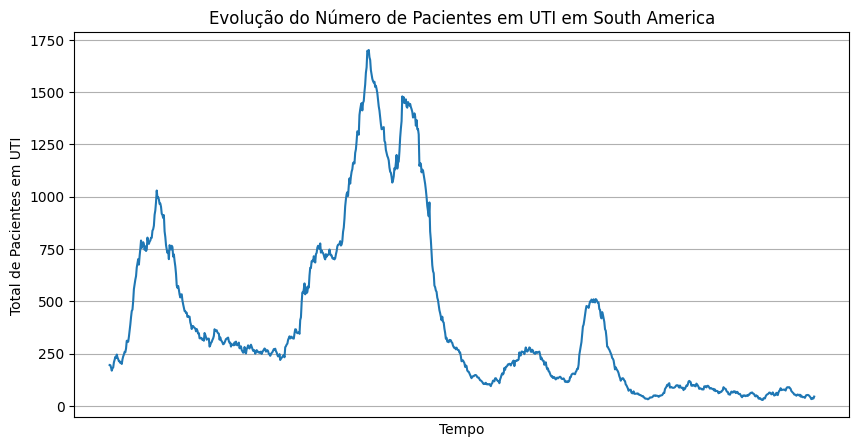

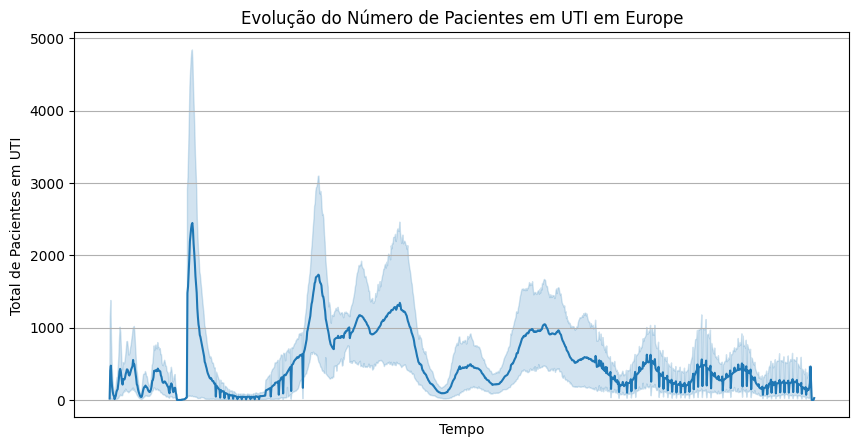

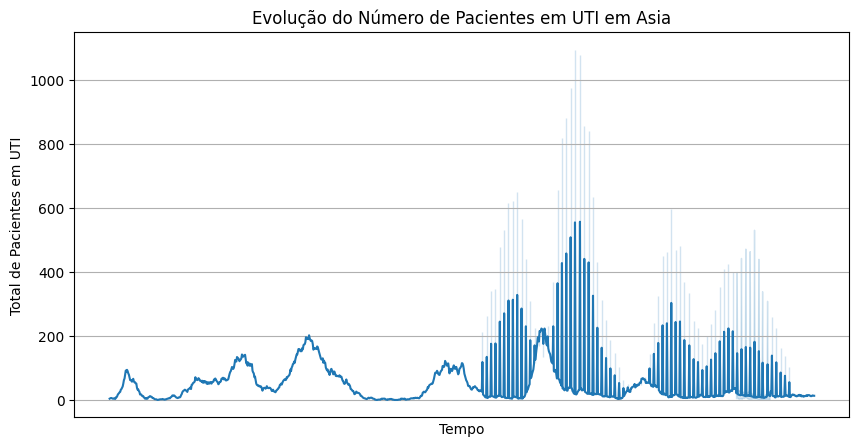

In [22]:
# Como o número de pacientes em UTI (unidade de terapia intensiva) varia ao longo do tempo em diferentes regiões?

c_deaths = covid_deaths[['continent', 'date', 'weekly_icu_admissions']]

df = c_deaths.dropna()

for continent in df['continent'].unique():
    plt.figure(figsize=(10, 5))  # Tamanho do gráfico
    sb.lineplot(x='date', y='weekly_icu_admissions', data=df[df['continent'] == continent])
    plt.title(f"Evolução do Número de Pacientes em UTI em {continent}")
    plt.xlabel("Tempo")
    plt.ylabel("Total de Pacientes em UTI")
    plt.gca().set_xticks([])
    plt.grid()
    plt.show()



Infelizmente, não possuímos dados de todos os continentes para uma análise completa. Entretanto, é possível observar que a região com curvas de casos mais acentuadas é a América do Sul.

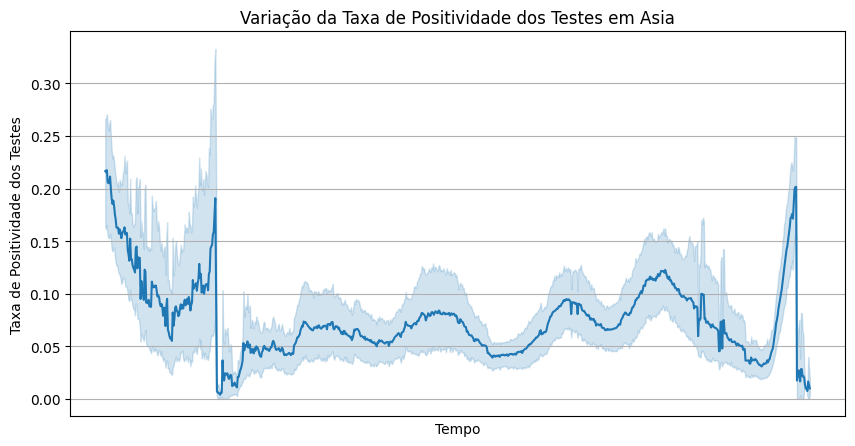

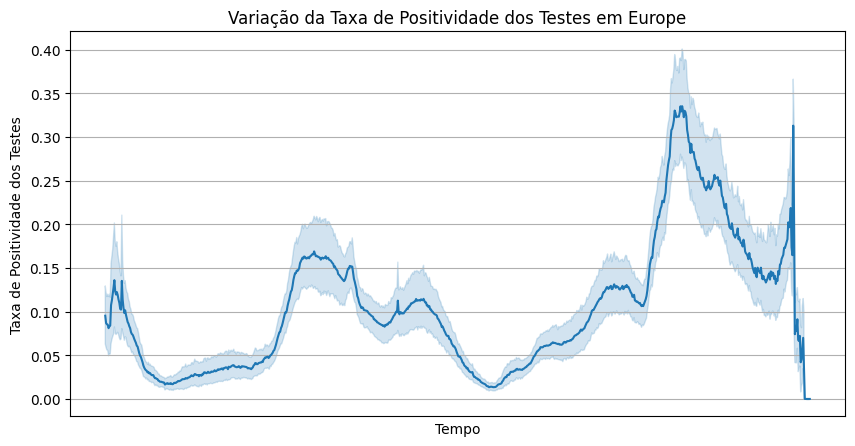

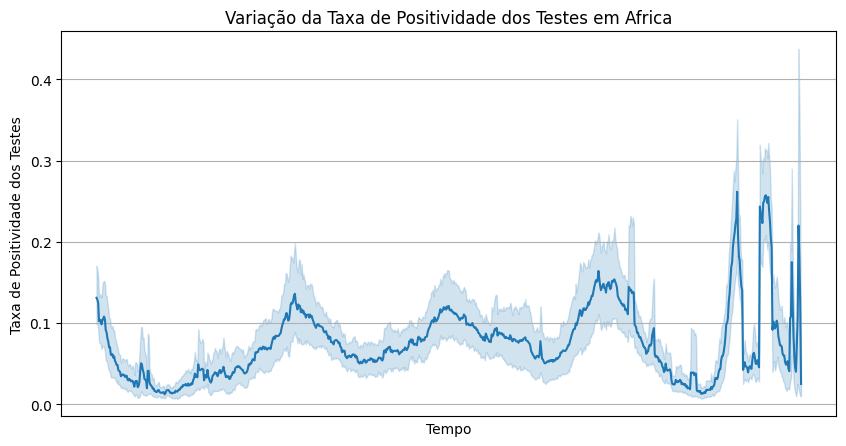

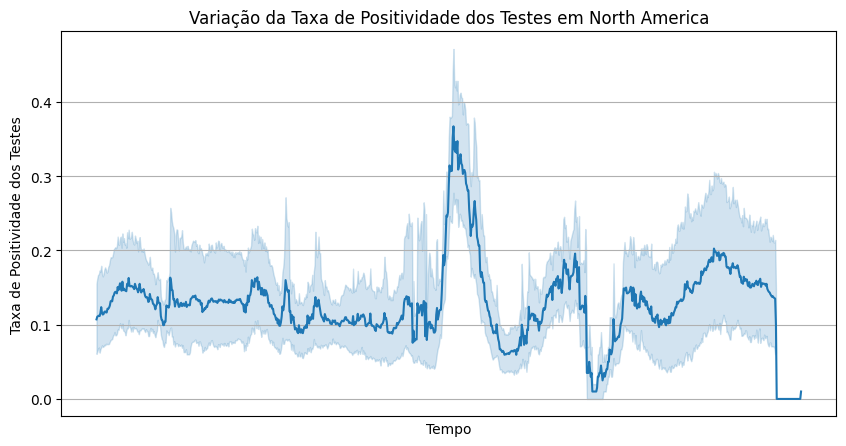

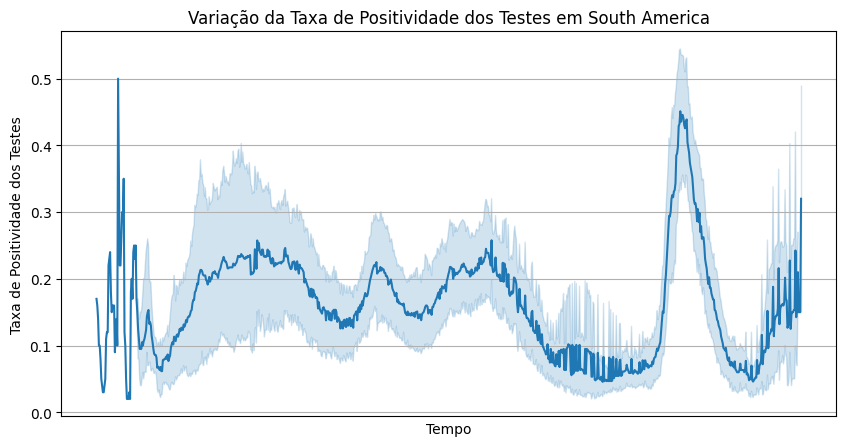

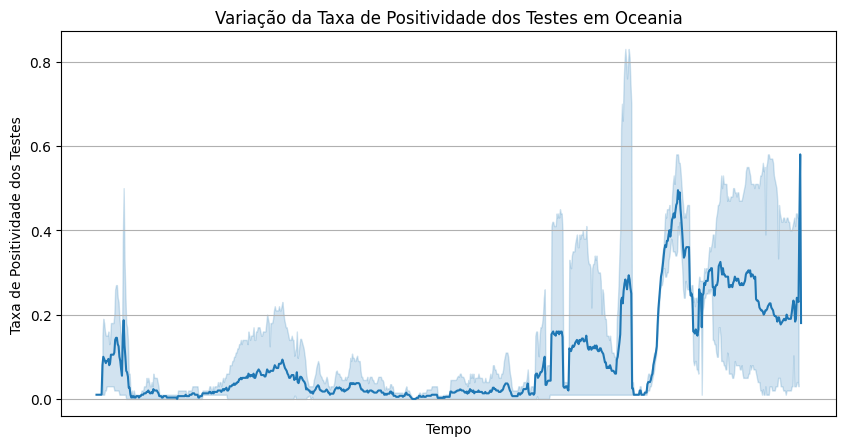

In [32]:
# Como a taxa de positividade dos testes de COVID-19 varia entre as regiões?

c_vax = covid_vax[['continent', 'date', 'positive_rate']]

df = c_vax.dropna()

for continent in df['continent'].unique():
    plt.figure(figsize=(10, 5))  # Tamanho do gráfico
    sb.lineplot(x='date', y='positive_rate', data=df[df['continent'] == continent])
    plt.title(f"Variação da Taxa de Positividade dos Testes em {continent}")
    plt.xlabel("Tempo")
    plt.ylabel("Taxa de Positividade dos Testes")
    plt.gca().set_xticks([])
    plt.grid()
    plt.show()

Observamos uma consistente variação em ciclos de aumento e diminuição ao longo do tempo em todas as regiões analisadas. Isso sugere uma dinâmica cíclica na propagação do vírus.